## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Reading and Understanding the Data

In [187]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [188]:
pwd

'C:\\Users\\User\\Downloads'

In [189]:
#READ DATA
df=pd.read_csv("day.csv")

In [190]:
# data Head values
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [191]:
#To check columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [192]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [193]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [194]:
#checking for null values in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [195]:
#from the given data we can see that instant is an index column so we drop it
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Changing the values present in the data as mentioned:

- season : 
    - 1:spring
    - 2:summer
    - 3:fall
    - 4:winter
- mnth : 
    - 1:January
    - 2:February
    - 3:March
    - 4:April
    - 5:May
    - 6:June
    - 7:July
    - 8:August
    - 9:September
    - 10:October
    - 11:November
    - 12:December
- weekday :
    - 0:Sunday
    - 1:Monday
    - 2:Tuesday
    - 3:Wednesday
    - 4:Thursday
    - 5:Friday
    - 6:Saturday
- weathersit : 
    - 1: Clear_Few Clouds
    - 2: Mist_cloudy
    - 3: Light rain_Light snow_Thunderstorm
    - 4: Heavy Rain_Ice Pallets_Thunderstorm_Mist

In [196]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising the Data

### Visualising Numeric Variables

<Figure size 1152x720 with 0 Axes>

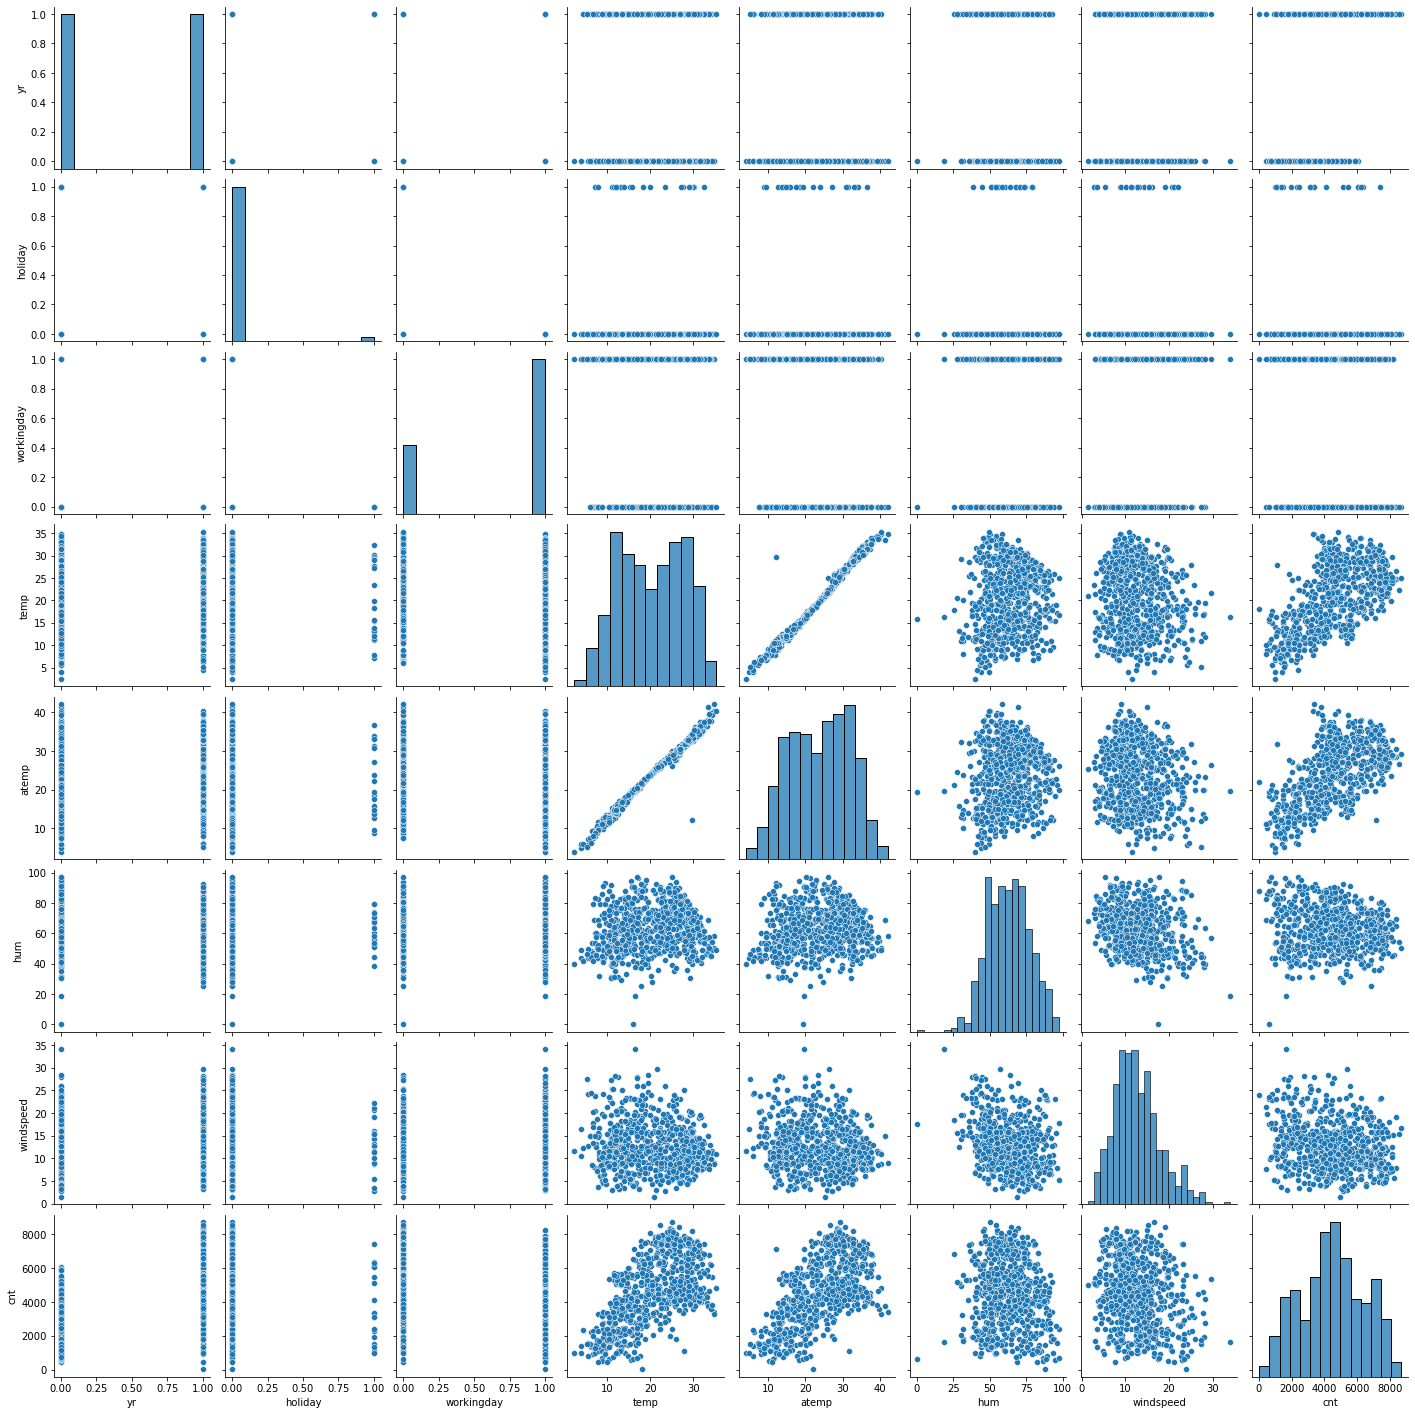

In [198]:
#Scatter Plot to understand numerical variables
plt.figure(figsize = (16, 10))
sns.pairplot(df)
plt.show()

#### from above graphs we can say that temp and atemp have a highest relationship

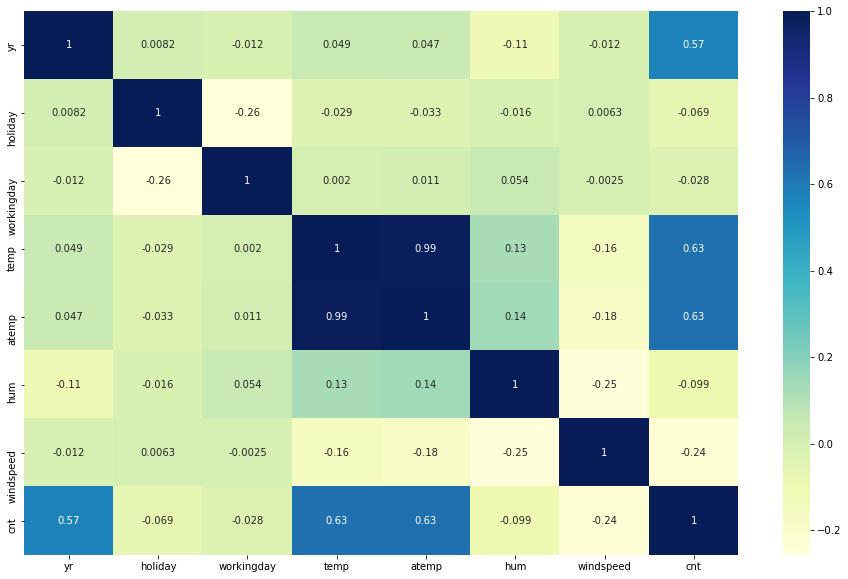

In [199]:
# boxplot for the categorical variables
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [200]:
#correlation between temp and atemp is 0.99 which is almost 1, so drop temp and consider atemp
df.drop(['temp'],axis=1,inplace=True)

### Visualising Categorical Variables

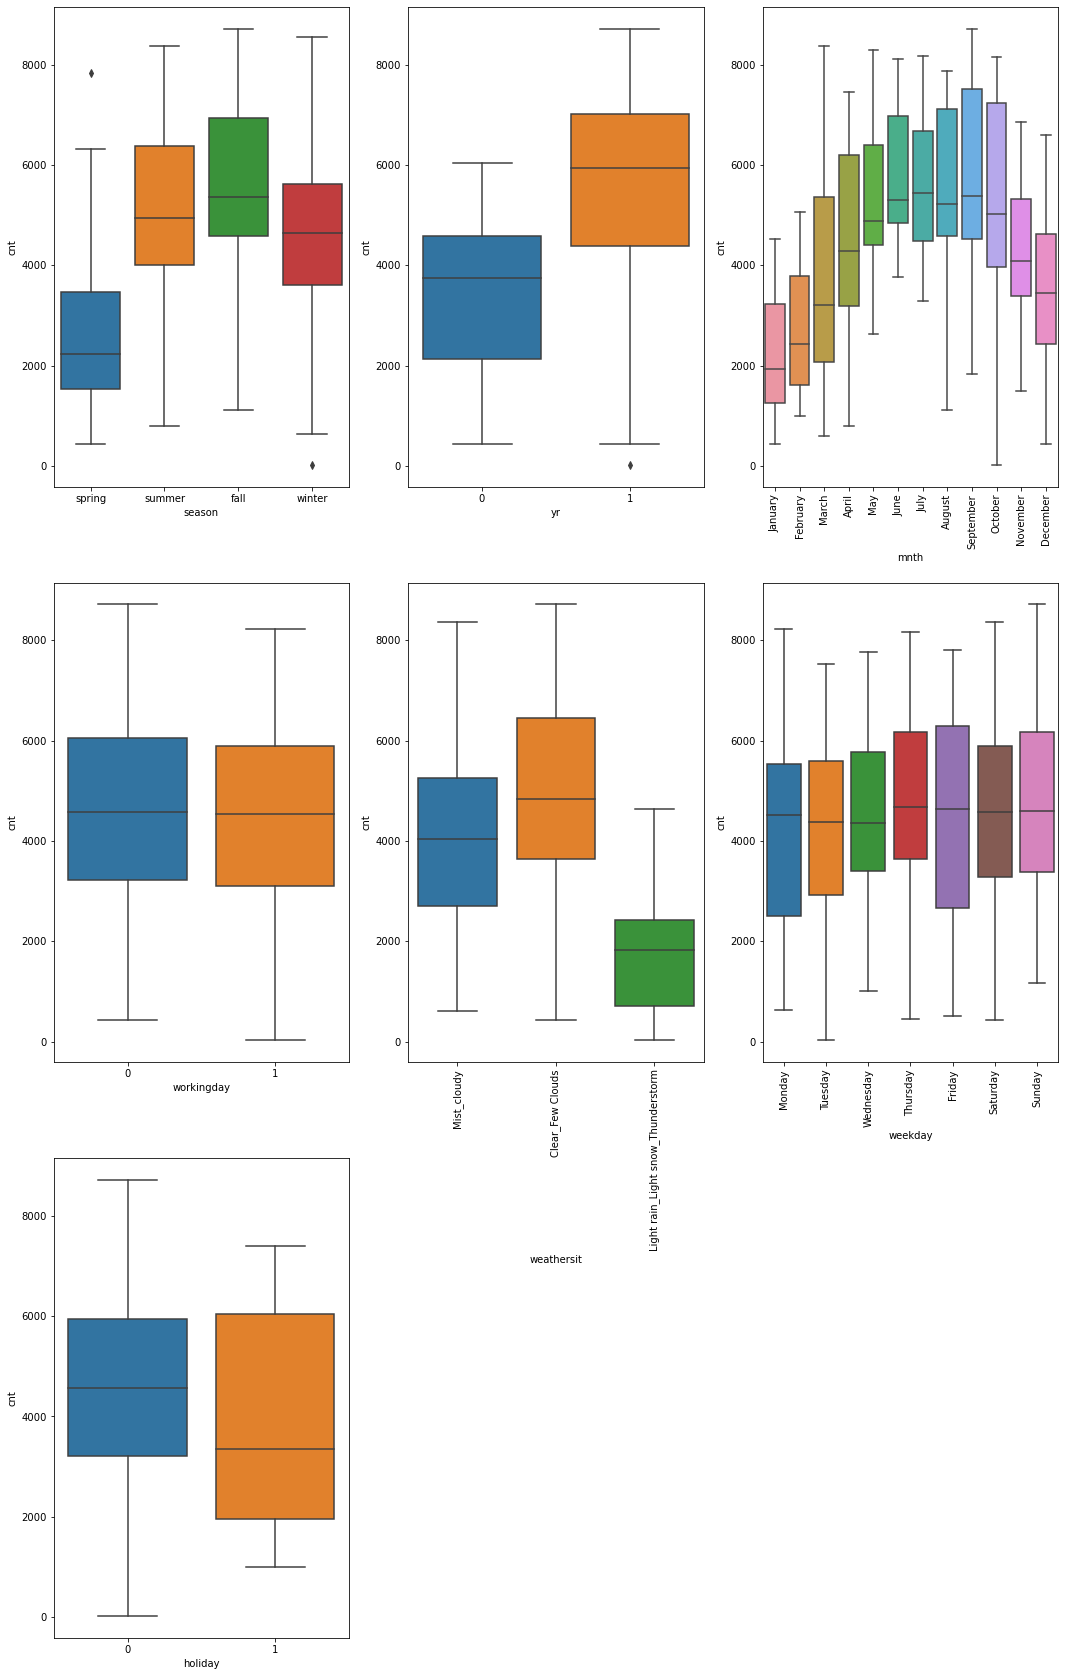

In [205]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(18, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
ax= sns.boxplot(x = 'mnth', y = 'cnt', data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
bx=sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
bx.set_xticklabels(bx.get_xticklabels(),rotation=90)
plt.subplot(3,3,6)
cx=sns.boxplot(x = 'weekday', y = 'cnt', data = df)
cx.set_xticklabels(cx.get_xticklabels(),rotation=90)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

## Creating Dummy Variables

In [40]:
#Creating the dummy variables for the Categorical variables

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [41]:
# Concatinating the the dummy data to the Data Frame 
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [42]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [46]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Rescaling the Features

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns 'atemp','hum','windspeed','cnt'
num_vars = ['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [119]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [120]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 4),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 3),
 ('Wednesday', False, 6),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', False, 5),
 ('June', False, 2),
 ('March', False, 9),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 7),
 ('September', True, 1)]

In [121]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy',
       'Saturday', 'Sunday', 'August', 'December', 'February', 'January',
       'May', 'November', 'September'],
      dtype='object')

In [122]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Thursday', 'Tuesday', 'Wednesday', 'July', 'June', 'March',
       'October'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [123]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [124]:
import statsmodels.api as sm  
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [125]:
#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [126]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.69e-183
Time:                        02:34:38   Log-Likelihood:                 514.32
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     489   BIC:                            -897.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Checking VIF

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.15
4,hum,40.96
3,atemp,38.00
6,spring,13.52
8,winter,12.49
13,Sunday,12.20
12,Saturday,11.61
7,summer,9.82
25,November,7.15
26,October,6.96


In [128]:
#COLUMN "Sunday" HAS A VERY HIGH P value and VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [144]:
# After removing "Sunday"

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.29e-186
Time:                        02:45:56   Log-Likelihood:                 511.24
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     493   BIC:                            -916.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [145]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.66
4,atemp,2.84
8,winter,2.35
14,January,2.26
5,hum,1.92
7,summer,1.82
15,November,1.76
13,February,1.72
12,December,1.63
10,Mist_cloudy,1.58


In [131]:
#COLUMN "Saturday" HAS A VERY HIGH P value and VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [146]:
# After removing "Saturday"

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.29e-186
Time:                        02:46:12   Log-Likelihood:                 511.24
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     493   BIC:                            -916.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [133]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.52
7,spring,6.03
4,atemp,4.32
9,winter,4.10
8,summer,3.80
15,January,2.35
5,hum,1.98
14,February,1.86
17,November,1.80
12,August,1.69


In [134]:
#COLUMN "May" HAS A VERY HIGH P value and VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['May'],axis=1)

In [147]:
# After removing "May"

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.29e-186
Time:                        02:46:41   Log-Likelihood:                 511.24
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     493   BIC:                            -916.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [148]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.66
4,atemp,2.84
8,winter,2.35
14,January,2.26
5,hum,1.92
7,summer,1.82
15,November,1.76
13,February,1.72
12,December,1.63
10,Mist_cloudy,1.58


In [137]:
#COLUMN "spring" HAS A VERY HIGH P value and VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['spring'],axis=1)

In [149]:
# After removing "spring"

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.29e-186
Time:                        02:47:04   Log-Likelihood:                 511.24
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     493   BIC:                            -916.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [150]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.66
4,atemp,2.84
8,winter,2.35
14,January,2.26
5,hum,1.92
7,summer,1.82
15,November,1.76
13,February,1.72
12,December,1.63
10,Mist_cloudy,1.58


### Out all the models model above seems to give good result so we choose it.

## Residual Analysis of the train data

In [151]:
#Predict values
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

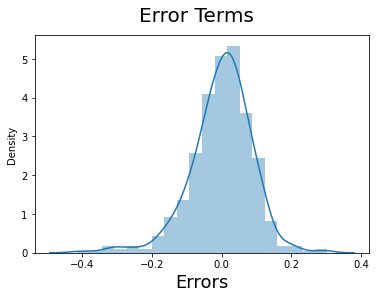

In [153]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

In [156]:
# Applying the scaling on the test sets
num_vars = ['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [157]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [158]:
y_test = df_test.pop('cnt')
X_test = df_test

In [164]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [165]:
# Creating X_test_m dataframe by dropping variables from X_test_m

X_test_m = X_test_m.drop(["Sunday", "Saturday", "May","spring","Monday","Thursday","Tuesday","Wednesday","July","June","March","October"], axis = 1)

In [168]:
# Making predictions using the fourth model

y_pred_m = lm .predict(X_test_m)

## Model Evaluation

Text(0, 0.5, 'y_pred_m')

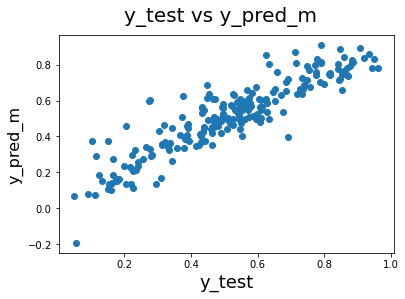

In [176]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred_m', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m', fontsize = 16)  

#### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [172]:
#The mean squared error
np.sqrt(mean_squared_error(y_test, y_pred_m))

0.09273311318872691

In [173]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred_m)
r_squared

0.8189433843411309

#### R square of our model is 0.843

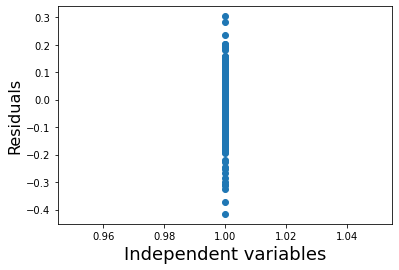

In [184]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_train_rfe.iloc[:,0].values,y_train - y_train_cnt)
fig.suptitle('Independent varress vs res', fontsize=20)
plt.xlabel('Independent variables', fontsize=18)
plt.ylabel('Residuals', fontsize=16)  
plt.show()

## We can see that the equation for best fitted line is:

### cnt= 0.2311 X yr - 0.0999 X holiday - 0.0210 X workingday + 0.4755 X atemp - 0.1563 X hum - 0.1761 X windspeed + 0.0788 X summer + 0.1369 X winter - 0.2447 X Light rain_Light snow_Thunderstorm - 0.0596 X Mist_cloudy + 0.0604 X August - 0.0518 X December - 0.0493 X January - 0429 X November + 0.1111 X September



## We can see the demand for bikes depends mainly on below variables:

### yr , holiday ,workingday, atemp, hum,windspeed ,summer ,winter, Light rain_Light snow_Thunderstorm, Mist_cloudy, August, December, January, November, September

### Demands increases for yr, atemp, summer, winter, August, September

### Demand decreases for holiday , workingday, hum, windspeed, Light rain_Light snow_Thunderstorm, Mist_cloudy, December, January, November